In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ratings = pd.read_csv('../data/raw/ratings.csv', sep=',')
movies = pd.read_csv('../data/preprocessed/movies_id_updated.csv')
actors = pd.read_csv('../data/raw/actors.csv', sep=',')
countries = pd.read_csv('../data/raw/countries.csv', sep=',')
directors = pd.read_csv('../data/raw/directors.csv', sep=',')
genres = pd.read_csv('../data/raw/genres.csv', sep=',')
locations = pd.read_csv('../data/raw/locations.csv', sep=',')
movie_tags = pd.read_csv('../data/raw/movie_tags.csv', sep=',')
tags = pd.read_csv('../data/raw/tags.csv', sep=',')
omdb = pd.read_csv('../data/raw/omdb_total.csv')

# Ratings

In [7]:
ratings.head(5)

,user_id,movieID,rating
0,1264,2363,3.5
1,213,8368,2.5
2,593,64032,3.0
3,609,54995,4.0
4,1590,5005,4.0


In [8]:
# ratings without entry?
ratings.isna().sum()

user_id    0
movieID    0
rating     0
dtype: int64

In [9]:
# how are the given ratings distributed?
ratings['rating'].describe()[1:]

mean    3.437447
std     1.002791
min     0.500000
25%     3.000000
50%     3.500000
75%     4.000000
max     5.000000
Name: rating, dtype: float64

In [10]:
# how many ratings are available for each user? - from 18 to 3269
# how many different users? - 2113
ratings['user_id'].value_counts().describe()

count    2113.000000
mean      384.674870
std       399.343004
min        18.000000
25%       101.000000
50%       258.000000
75%       523.000000
max      3269.000000
Name: user_id, dtype: float64

In [11]:
# what kind of ratings does a user give?
ratings.groupby('user_id')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
0,402.0,3.675373,1.249325,0.5,3.00,4.0,4.500,5.0
1,549.0,3.349727,0.881534,0.5,3.00,3.5,4.000,5.0
2,365.0,3.061644,1.148773,0.5,2.50,3.5,4.000,5.0
3,168.0,2.997024,1.180552,0.5,2.00,3.0,4.000,5.0
4,1936.0,3.844267,0.739193,0.5,3.50,4.0,4.500,5.0
...,...,...,...,...,...,...,...,...
2108,19.0,3.394737,0.875261,2.0,3.00,3.5,4.000,4.5
2109,23.0,4.108696,0.768063,2.5,3.75,4.0,4.750,5.0
2110,19.0,2.736842,1.548910,0.5,1.75,2.0,4.250,5.0


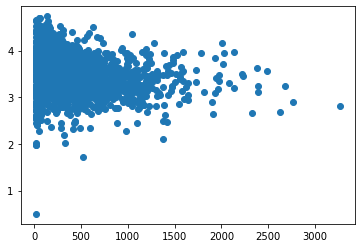

In [12]:
# correlation between amount of available ratings and mean rating?
plt.scatter(ratings.groupby('user_id')['rating'].describe()['count'], ratings.groupby('user_id')['rating'].describe()['mean'])

In [13]:
# how many ratings are available for each movie? - from 1 to 1584
# how many different movies? - 10069
ratings['movieID'].value_counts().describe()

count    10069.000000
mean        80.724799
std        163.794386
min          1.000000
25%          6.000000
50%         20.000000
75%         72.000000
max       1584.000000
Name: movieID, dtype: float64

In [14]:
ratings['movieID'].value_counts()[:5]

2571    1584
4993    1493
356     1491
5952    1459
296     1457
Name: movieID, dtype: int64

In [15]:
# most rated movies:
for i in ratings['movieID'].value_counts()[:5].index:
    print(movies[movies['id']==i]['title'])

2350    The Matrix
Name: title, dtype: object
4679    The Lord of the Rings: The Fellowship of the Ring
Name: title, dtype: object
343    Forrest Gump
Name: title, dtype: object
5606    The Lord of the Rings: The Two Towers
Name: title, dtype: object
285    Pulp Fiction
Name: title, dtype: object


# Movies

In [16]:
movies.head(1)

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtPictureURL
0,1,Toy story,tt0114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995.0,toy_story,http://content7.flixster.com/movie/10/93/63/10...


In [17]:
movies.columns

Index(['id', 'title', 'imdbID', 'spanishTitle', 'imdbPictureURL', 'year',
       'rtID', 'rtPictureURL'],
      dtype='object')

In [20]:
#check for duplicates within the data
print('duplicates:')
for i in movies.columns[:4]:
    print(i, movies[i].duplicated().sum())
    print(i, movies[movies[i].duplicated()][i].value_counts())


duplicates:
id 0
id Series([], Name: id, dtype: int64)
title 791
title Hamlet                                                5
The Phantom of the Opera                              5
Interview with the Vampire: The Vampire Chronicles    3
August Rush                                           3
King Kong                                             3
                                                     ..
Impulse                                               1
Joan of Arc                                           1
Underworld: Evolution                                 1
Milk                                                  1
Teacher's Pet                                         1
Name: title, Length: 701, dtype: int64
imdbID 774
imdbID tt0116477    5
tt0293508    4
tt0426931    3
tt0450314    3
tt0049366    3
            ..
tt0042332    1
tt0093978    1
tt0144120    1
tt0480269    1
tt0223268    1
Name: imdbID, Length: 690, dtype: int64
spanishTitle 840
spanishTitle Hamlet               

In [69]:
movies[movies['title']=='Hamlet']

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtPictureURL
1284,1411,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...
1735,1941,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...
2589,2820,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...
3319,3598,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...
3441,3723,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...
9986,61246,Hamlet,tt0116477,Hamlet,http://ia.media-imdb.com/images/M/MV5BMTM5NjMz...,1996.0,1075422-hamlet,http://content7.flixster.com/movie/10/94/26/10...


In [94]:
# be aware of new versions of movies
movies[movies['title']=='The Phantom of the Opera']

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtPictureURL
1489,1655,The Phantom of the Opera,tt0293508,El fantasma de la ópera de Andrew Lloyd Webber,http://ia.media-imdb.com/images/M/MV5BNDczNzg4...,2004.0,phantom_of_the_opera,http://content9.flixster.com/movie/35/84/18/35...
3644,3936,The Phantom of the Opera,tt0293508,El fantasma de la ópera de Andrew Lloyd Webber,http://ia.media-imdb.com/images/M/MV5BNDczNzg4...,2004.0,phantom_of_the_opera,http://content9.flixster.com/movie/35/84/18/35...
4485,4794,The Phantom of the Opera,tt0016220,El fantasma de la ópera,http://ia.media-imdb.com/images/M/MV5BMTQ3NDk2...,1925.0,1016240-phantom_of_the_opera,http://content6.flixster.com/movie/10/12/76/10...
7988,25755,The Phantom of the Opera,tt0293508,El fantasma de la ópera de Andrew Lloyd Webber,http://ia.media-imdb.com/images/M/MV5BNDczNzg4...,2004.0,phantom_of_the_opera,http://content9.flixster.com/movie/35/84/18/35...
8435,30816,The Phantom of the Opera,tt0293508,El fantasma de la ópera de Andrew Lloyd Webber,http://ia.media-imdb.com/images/M/MV5BNDczNzg4...,2004.0,phantom_of_the_opera,http://content9.flixster.com/movie/35/84/18/35...
8462,31026,The Phantom of the Opera,tt0293508,El fantasma de la ópera de Andrew Lloyd Webber,http://ia.media-imdb.com/images/M/MV5BNDczNzg4...,2004.0,phantom_of_the_opera,http://content9.flixster.com/movie/35/84/18/35...


In [21]:
dummy = pd.DataFrame()
for i in movies[movies['title']=='Hamlet']['id']:
    dummy = dummy.append(ratings[ratings['movieID']==i])

In [27]:
dummy

,user_id,movieID,rating
8333,631,1411,4.5
23495,24,1411,3.5
27141,395,1411,4.0
30299,727,1411,4.0
40015,163,1411,1.0
...,...,...,...
509666,1744,61246,3.5
510469,741,61246,2.5
646251,322,61246,1.0
702238,1228,61246,3.0


In [22]:
double_ratings_ids = dummy['user_id'].value_counts()[dummy['user_id'].value_counts()>1].index

In [26]:
dummy['user_id'].value_counts()

401     5
98      4
1373    4
144     4
83      4
       ..
234     1
1256    1
646     1
229     1
513     1
Name: user_id, Length: 295, dtype: int64

In [24]:
# number of users with multiple ratings for Hamlet
len(double_ratings_ids)
double_ratings_ids

Int64Index([ 401,   98, 1373,  144,   83,  176,  387,  237,  226, 1228,  782,
             606,  659,  456,  640,  103,  823, 1264,  336, 1059,   20,  656,
             143,  120, 1028,   94,  885,  769, 1135, 1534,  258,  773, 1267,
             273,  279,  839,  204, 1887,  811,  345,  300,  119,  243,  314,
             318,  203,  322,  289,  511,  239,  233,    8,   18,   22,    4,
              46,   61, 1042,  603,   99,  100,  516, 1126, 1129,  618,  631,
            1414,  650,  657,  671,  160,  163,  165,  678, 1036,  361,  715,
             727,  869,  920,  402,  102,  895,  381,  468,  395, 1397,  452,
             862,  901,  762,  137, 1445, 1419,  755,  906,  486,  495],
           dtype='int64')

In [74]:
dummy[dummy['user_id']==401]

,user_id,movieID,rating
430329,401,1411,3.5
550503,401,1941,3.0
382464,401,2820,2.5
133426,401,3598,1.0
105784,401,3723,4.0


In [86]:
dummy[dummy['user_id']==double_ratings_ids[1]]

,user_id,movieID,rating
549130,98,1411,5.0
215271,98,1941,5.0
791671,98,3598,1.5
453503,98,3723,3.5


In [87]:
dummy[dummy['user_id']==double_ratings_ids[2]]

,user_id,movieID,rating
62255,1373,1411,2.5
196557,1373,1941,3.5
664182,1373,3598,3.5
472317,1373,3723,3.0


In [92]:
movies[movies['title']=='Titanic']

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtPictureURL
1547,1721,Titanic,tt0120338,Titanic,http://ia.media-imdb.com/images/M/MV5BMTYwNTk5...,1997.0,titanic,http://content8.flixster.com/movie/16/90/53/16...
3137,3404,Titanic,tt0120338,Titanic,http://ia.media-imdb.com/images/M/MV5BMTYwNTk5...,1997.0,titanic,http://content8.flixster.com/movie/16/90/53/16...


In [98]:
# movie year entries?
movies['year'].describe()[1:]

mean    1988.244285
std       18.688709
min     1903.000000
25%     1981.000000
50%     1995.000000
75%     2002.000000
max     2011.000000
Name: year, dtype: float64

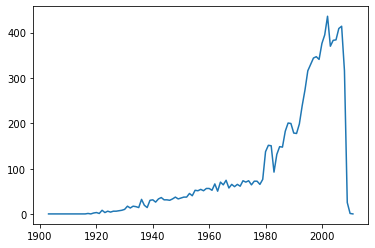

In [152]:
# visualized
plt.plot(movies['year'].value_counts().sort_index())

In [6]:
# 4 movies without year
movies.isna().sum()

id                  0
title               0
imdbID              0
spanishTitle        0
imdbPictureURL    185
year                4
rtID              315
rtPictureURL        4
dtype: int64

# Actors

In [107]:
# add male or female actor?
actors.isna().sum()

movieID      0
actorID      0
actorName    5
ranking      0
dtype: int64

In [109]:
actors[actors['actorName'].isna()]

,movieID,actorID,actorName,ranking
12722,532,not_applicable,NaN,26
113034,5218,not_applicable,NaN,15
123252,5710,not_applicable,NaN,7
168741,8202,not_applicable,NaN,19
184251,25941,not_applicable,NaN,6


In [108]:
actors[actors['actorID'].duplicated()]

,movieID,actorID,actorName,ranking
114,6,dennis_haysbert,Dennis Haysbert,14
130,6,mykelti_williamson,Mykelti Williamson,9
374,12,maud_winchester,Maud Winchester,27
411,13,jack_angel,Jack Angel,8
428,14,bob_hoskins,Bob Hoskins,5
...,...,...,...,...
231736,65133,patsy_byrne,Patsy Byrne,5
231737,65133,rik_mayall,Rik Mayall,6
231738,65133,rowan_atkinson,Rowan Atkinson,7
231739,65133,stephen_fry,Stephen Fry,8


In [111]:
# only select top-ranked actors?
actors[actors['ranking']<10]['actorID'].value_counts()

robert_de_niro         69
samuel_l_jackson       57
robert_duvall          56
harvey_keitel          55
christopher_walken     55
                       ..
leigh_hamilton          1
mapi_galan              1
artel_kayaru            1
annabella_piugattuk     1
antonio_mayans          1
Name: actorID, Length: 35008, dtype: int64

In [101]:
actors['movieID'].value_counts().describe()

count    10174.000000
mean        22.777865
std         17.560943
min          1.000000
25%         11.000000
50%         17.000000
75%         30.000000
max        220.000000
Name: movieID, dtype: float64

In [102]:
actors['movieID'].value_counts()

3246     220
54190    190
5686     188
785      178
7143     163
        ... 
2373       1
8908       1
26242      1
6284       1
4458       1
Name: movieID, Length: 10174, dtype: int64

# countries

In [115]:
countries['country'].value_counts()

USA                               6831
UK                                1015
France                             577
Canada                             233
Italy                              205
                                  ... 
Algeria                              1
Senegal                              1
Occupied Palestinian Territory       1
Singapore                            1
Venezuela                            1
Name: country, Length: 71, dtype: int64

,movieID,country
0,1,USA
1,2,USA
2,3,USA
3,4,USA
4,5,USA
...,...,...
10192,65088,USA
10193,65091,USA
10194,65126,USA
10195,65130,USA


# directors

In [117]:
directors.isna().sum()

movieID         0
directorID      0
directorName    0
dtype: int64

In [119]:
directors['directorID'].value_counts()

alfred_hitchcock     48
woody_allen          40
clint_eastwood       32
martin_scorsese      30
akira_kurosawa       30
                     ..
stuart_burge          1
yoshifumi_kondo       1
steve_mcqueen_iii     1
brian_goodman         1
rolf-schubel          1
Name: directorID, Length: 4060, dtype: int64

# genres

In [123]:
genres['genre'].value_counts()

Drama          5076
Comedy         3566
Thriller       1664
Romance        1644
Action         1445
Crime          1086
Adventure      1003
Horror          978
Sci-Fi          740
Fantasy         535
Children        519
Mystery         497
War             494
Documentary     430
Musical         421
Animation       279
Western         261
Film-Noir       145
IMAX             25
Short             1
Name: genre, dtype: int64

In [122]:
genres

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
20804,65126,Comedy
20805,65126,Drama
20806,65130,Drama
20807,65130,Romance


# locations

In [124]:
locations

,movieID,location1,location2,location3,location4
0,1,NaN,NaN,NaN,NaN
1,2,Canada,British Columbia,NaN,NaN
2,2,Canada,British Columbia,Delta,NaN
3,2,Canada,British Columbia,Delta,Tsawwassen
4,2,Canada,British Columbia,Maple Ridge,NaN
...,...,...,...,...,...
49162,65130,USA,New York,New York City,"Lower Manhattan, Manhattan"
49163,65130,USA,New York,New York City,"Tribeca, Manhattan"
49164,65130,USA,New York,Westchester County,NaN
49165,65133,UK,England,Hertfordshire,"Wrotham Park, Barnet"


# movie_tags

In [132]:
movie_tags

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1
...,...,...,...
51790,65037,792,1
51791,65037,2214,1
51792,65126,5281,1
51793,65126,13168,1


In [127]:
movie_tags['tagID'].value_counts()

6800     640
398      491
1925     403
887      370
1061     369
        ... 
14252      2
12207      2
12785      2
8169       2
2049       2
Name: tagID, Length: 5297, dtype: int64

In [128]:
# strange tags?
tags[tags['id']==6800]

,id,value
5887,6800,tumeys dvds


In [129]:
tags[tags['id']==398]

,id,value
379,398,less than 300 ratings


In [130]:
tags[tags['id']==1925]

,id,value
1717,1925,erlends dvds


In [131]:
tags[tags['id']==887]

,id,value
799,887,70mm


# omdb

In [134]:
del omdb['Unnamed: 0']

In [136]:
omdb.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD',
       'BoxOffice', 'Production', 'Website', 'Response',
       'Internet Movie Database', 'Rotten Tomatoes', 'Metacritic',
       'totalSeasons', 'Season', 'Episode', 'seriesID'],
      dtype='object')

In [139]:
omdb.isna().sum()

Title                          0
Year                           0
Rated                        447
Released                      58
Runtime                        9
Genre                          6
Director                      75
Writer                       221
Actors                        11
Plot                          19
Language                      27
Country                        5
Awards                      2187
Poster                        12
Metascore                   4179
imdbRating                     4
imdbVotes                      7
imdbID                         0
Type                           0
DVD                         8562
BoxOffice                  10015
Production                  8605
Website                    10182
Response                       0
Internet Movie Database        4
Rotten Tomatoes             1297
Metacritic                  4177
totalSeasons               10124
Season                     10184
Episode                    10184
seriesID  